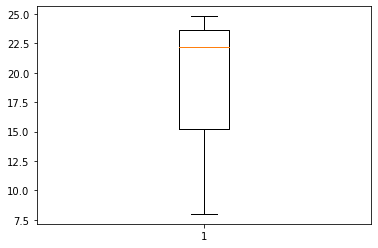

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("./CSV/auto-mpg.csv")
df.describe(include="object")
(df.horsepower == "?").sum()
df[df['horsepower']=='?']


df[df.isna()].sum()
df[df.duplicated()]
df=df.drop(df[df["horsepower"] == "?"].index,axis=0)
(df.horsepower == "?").sum()


df.nunique()


df.value_counts().sum()
df.origin.value_counts()
df[['cylinders','origin']].value_counts()
df['horsepower']=df['horsepower'].astype('int64')
df['horsepower']


df.corr()
# pd.plotting.scatter_matrix(df,figsize=(20,20))
# pd.plotting.parallel_coordinates(df,'origin',cols=['acceleration','mpg','horsepower','cylinders'],color=['red','green','blue','yellow','pink'])
# plt.boxplot(df[['horsepower','origin','acceleration','displacement']])
plt.show()

q1=df['acceleration'].quantile(0.25)
q3=df['acceleration'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
df=df[(df["acceleration"] <lower_bound)|(df["acceleration"] >upper_bound)]
plt.boxplot(df['acceleration'])
plt.show()

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("./CSV/chile.csv")
# df=df.dropna()
# pd.crosstab(df['sex'],df['education'],values=df['income'],aggfunc={min,max,np.mean})
c=pd.crosstab([df['sex'],df['region'],df['education'],df['vote']],columns=['sex'])
print(c)

col_0                      sex
sex region education vote     
F   C      P         A       5
                     N      22
                     U      41
                     Y      56
           PS        A       1
...                        ...
M   SA     PS        Y      33
           S         A      13
                     N      93
                     U      40
                     Y      51

[114 rows x 1 columns]


In [108]:
help(pd.crosstab)

Help on function crosstab in module pandas.core.reshape.pivot:

crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name: str = 'All', dropna: bool = True, normalize=False) -> 'DataFrame'
    Compute a simple cross tabulation of two (or more) factors. By default
    computes a frequency table of the factors unless an array of values and an
    aggregation function are passed.
    
    Parameters
    ----------
    index : array-like, Series, or list of arrays/Series
        Values to group by in the rows.
    columns : array-like, Series, or list of arrays/Series
        Values to group by in the columns.
    values : array-like, optional
        Array of values to aggregate according to the factors.
        Requires `aggfunc` be specified.
    rownames : sequence, default None
        If passed, must match number of row arrays passed.
    colnames : sequence, default None
        If passed, must match number of column arrays passed.